In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier as KNC
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# import dataset
DR_df = pd.read_csv("../Resources/DR_complete_clean.csv")
DR_df.head()

,class_,u_,g_,r_,i_,z_,redshift_
0,2,19.19619,17.83329,17.52225,17.40237,17.35182,-0.000220
1,2,21.65541,19.13715,17.92577,17.44741,17.15818,-0.000008
2,2,20.70867,19.20954,18.55966,18.24395,18.10117,0.000096
3,2,22.88806,21.20900,19.90560,19.33555,19.08966,-0.000247
4,2,17.82932,16.11081,15.39808,15.13612,15.00507,-0.000131


In [2]:
# Dropping 'redshift_' column
DR_df = DR_df.drop("redshift_", axis=1)

DR_df.head()

,class_,u_,g_,r_,i_,z_
0,2,19.19619,17.83329,17.52225,17.40237,17.35182
1,2,21.65541,19.13715,17.92577,17.44741,17.15818
2,2,20.70867,19.20954,18.55966,18.24395,18.10117
3,2,22.88806,21.20900,19.90560,19.33555,19.08966
4,2,17.82932,16.11081,15.39808,15.13612,15.00507


In [3]:
X = DR_df.drop('class_', axis=1) # independent features
y = DR_df['class_'] # Target

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

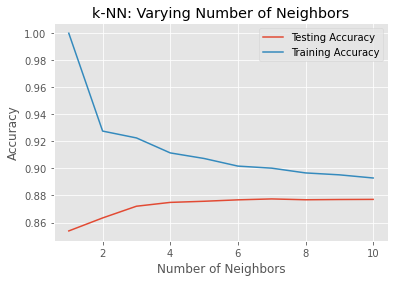

In [5]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNC(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [6]:
# Fitting the model
knn = KNC(n_neighbors = 8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

## Assessing the Model

In [7]:
# Accuracy score
score = knn.score(X_test, y_test)
print("Accuracy = Fraction of correct predictions")
print("Test set accuracy:\n{}".format(score))

Accuracy = Fraction of correct predictions
Test set accuracy:
0.876835286859963


In [8]:
# Computing Confusion Matrix
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[19181   383   490]
 [  700  3842   497]
 [ 1229   694  5404]]


In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93     20054
           1       0.78      0.76      0.77      5039
           2       0.85      0.74      0.79      7327

    accuracy                           0.88     32420
   macro avg       0.85      0.82      0.83     32420
weighted avg       0.87      0.88      0.87     32420



In [10]:
from sklearn.preprocessing import MinMaxScaler

# Scale only columns that have values greater than 1
to_scale = [col for col in DR_df.columns if DR_df[col].max() > 1]
mms = MinMaxScaler()
scaled = mms.fit_transform(DR_df[to_scale])
scaled = pd.DataFrame(scaled, columns=to_scale)

# Replace original columns with scaled ones
for col in scaled:
    if(col != 'class_'):
        DR_df[col] = scaled[col]
    
DR_df.head()

,class_,u_,g_,r_,i_,z_
0,2,0.421106,0.413640,0.401527,0.998689,0.425911
1,2,0.543768,0.480139,0.420240,0.998693,0.416062
2,2,0.496546,0.483831,0.449635,0.998773,0.464025
3,2,0.605251,0.585806,0.512051,0.998881,0.514302
4,2,0.352929,0.325790,0.303021,0.998463,0.306550


In [11]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X = DR_df.drop('class_', axis=1) # independent features
y = DR_df['class_'] # Target

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (108066, 5)
Shape of X after SMOTE: (200538, 5)

Balance of positive and negative classes (%):


2    33.333333
1    33.333333
0    33.333333
Name: class_, dtype: float64

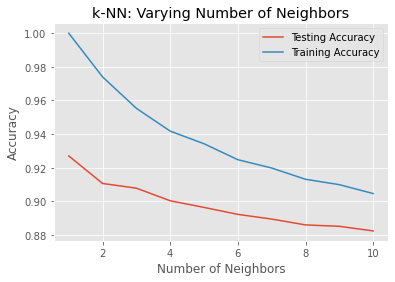

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=21, stratify=y_sm)

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNC(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [13]:
knn = KNC(n_neighbors = 4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [14]:
# Accuracy score
score = knn.score(X_test, y_test)
print("Accuracy = Fraction of correct predictions")
print("Test set accuracy:\n{}".format(score))

Accuracy = Fraction of correct predictions
Test set accuracy:
0.9003191383265184


In [15]:
# Computing Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[17994  1026  1034]
 [  789 18889   376]
 [ 1318  1454 17282]]


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     20054
           1       0.88      0.94      0.91     20054
           2       0.92      0.86      0.89     20054

    accuracy                           0.90     60162
   macro avg       0.90      0.90      0.90     60162
weighted avg       0.90      0.90      0.90     60162

